### Worksheet 5
#### Author: Sunghyun Ahn

In [1]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


from ISLP import load_data

import tensorflow as tf
import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from keras.datasets import cifar10

### Exercise 1
Using a neural network, the goal is to predict if I will buy a car based on the price alone. 7 example observations are given in the table below. The input $X$ gives car price in thousands of dollars and the response $Y$ gives my purchase decision.

(a-b) Include a photo of your by-hand work here. 

![a-b](W5\KakaoTalk_20250428_220826773.jpg)

In [2]:
# Given data
data = {
    'obs': [1, 2, 3, 4, 5, 6, 7],
    'X': [0, 5, 19, 20, 45, 50, 60],
    'Y_actual': ['yes', 'no', 'no', 'yes', 'yes', 'no', 'no']
}

(c) Code up the function you found above. For each of the 7 observations above, find the value for $f(X)$, the output value of the neural network. Write your values in the table. On this training data, how well does this model predict my purchase decision? Assume a threshold of 0.5 differentiates yes/no.
- If you look at the attached photo, you can see that the values come out to (for each observation). 
1. 0.51910935
2. 0.34658
3. 0.45
4. 0.50
5. 0.54
6. 0.087
7. 0.00025

Since the decision was yes, no, no, yes, yes, no, no. With a threshold of 0.5, it actually fits exactly to the decision.

In [3]:
# Define function to compute f(X)
def compute_f(X):
    z1 = -8 + (0.4 * X)
    z2 = 1 + (0.25 * X)
    z3 = -28 + (0.6 * X)
    
    g1 = 1 / (1 + np.exp(-z1))
    g2 = 1 / (1 + np.exp(-z2))
    g3 = 1 / (1 + np.exp(-z3))
    
    f_X = 1.25 + 0.5 * g1 - 1 * g2 - 0.75 * g3
    return f_X

In [4]:
df = pd.DataFrame(data)
df['f(X)'] = df['X'].apply(compute_f)

In [5]:
df.head(10)

,obs,X,Y_actual,f(X)
0,1,0,yes,0.519109
1,2,5,no,0.346586
2,3,19,no,0.453829
3,4,20,yes,0.502473
4,5,45,yes,0.548276
5,6,50,no,0.089400
6,7,60,no,0.000252


(d) Plot your model over a range of inputs from 0 to 100. Include a solid horizontal line for the threshold.

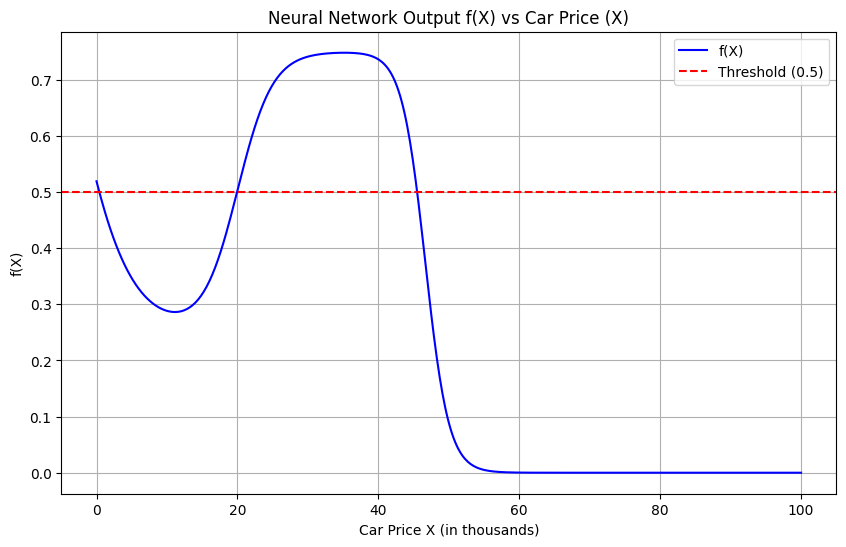

In [6]:
# Generate X values from 0 to 100
X_range = np.linspace(0, 100, 500)
Y_values = compute_f(X_range)

plt.figure(figsize=(10, 6))
plt.plot(X_range, Y_values, label='f(X)', color='blue')
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.title('Neural Network Output f(X) vs Car Price (X)')
plt.xlabel('Car Price X (in thousands)')
plt.ylabel('f(X)')
plt.legend()
plt.grid(True)
plt.show()

(e) Given this model, what is the response when $X=46$? How can this be interpreted in the context of the problem?

- If we solely look at the context of this problem, the response given was 0.4490. Meaning that for X=46, we will classify "NO" as the purchase decision. Looking at the curve above, that actually makes sense because ~44/45 is when the line starts to go back below the threshold

In [7]:
X_value = 46
f_46 = compute_f(X_value)

print(f"f(46) = {f_46:.4f}")

f(46) = 0.4490


### Exercise 2
Fit a neural network to the `Default` data from the `ISLP` package. Use a single hidden layer with 10 units, and dropout regularization. Compare the classification performance of your model with that of linear logistic regression.

You can see that the NN actually did worse in terms of mean absolute errors. However, the difference isn't that big. It's possible we can use different dropout layer and tune the number of epochs to get a better result, but regardless, both results are looking very good.

In [8]:
default = OJ = load_data('Default')

default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [9]:
# Encode categorical variables
le_default = LabelEncoder()
le_student = LabelEncoder()

default['default'] = le_default.fit_transform(default['default'])  # Yes=1, No=0
default['student'] = le_student.fit_transform(default['student'])  # Yes=1, No=0

# Define features and target
X = default[['student', 'balance', 'income']]
y = default['default']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [10]:
def NN_model(input_dim=1, num_classes=1):
    inputs = layers.Input(shape=input_dim)

    x = layers.Dense(10, activation='relu')(inputs)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = NN_model(input_dim=(X_train.shape[1],))

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8825 - loss: 0.4305 - val_accuracy: 0.9650 - val_loss: 0.2203
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9656 - loss: 0.2191 - val_accuracy: 0.9650 - val_loss: 0.1438
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9685 - loss: 0.1535 - val_accuracy: 0.9650 - val_loss: 0.1180
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9629 - loss: 0.1397 - val_accuracy: 0.9650 - val_loss: 0.1048
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9696 - loss: 0.1127 - val_accuracy: 0.9650 - val_loss: 0.0977
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9645 - loss: 0.1190 - val_accuracy: 0.9650 - val_loss: 0.0931
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.1009 - val_accuracy: 0.9650 - val_loss: 0.0888
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9706 - loss: 0.0989 - val_accuracy: 0.

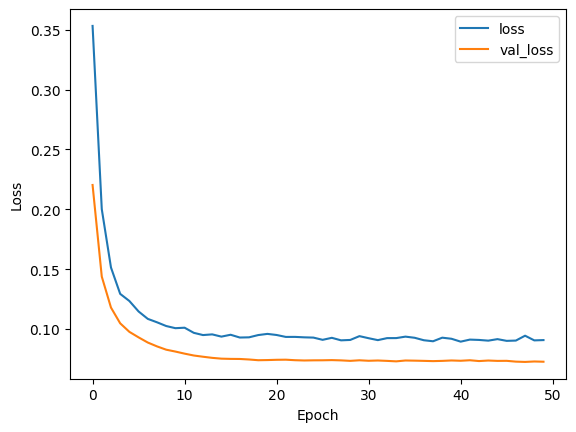

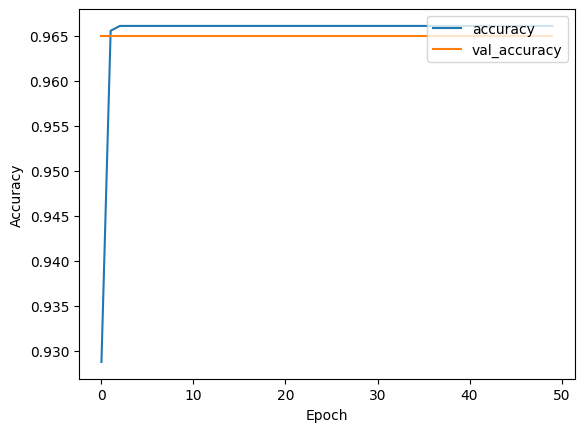

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
plt.show();

In [12]:
# Neural network prediction
nn_preds = model.predict(X_test)
nn_preds_labels = (nn_preds.flatten() > 0.5).astype(int)

# Neural network accuracy
acc = accuracy_score(y_test, nn_preds_labels)
acc

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step


0.9686666666666667

In [13]:
# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred_logreg)
acc

0.9736666666666667

### Exercise 3
From your collection of personal photographs, pick 10 images of animals (such as dogs, cats, birds, farm animals, etc.). If the subject does not occupy a reasonable part of the image, then crop the image. Now use a pretrained image classification CNN as in the lab to predict the class of each of your images, and report the probabilities for the top five predicted classes for each image.

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
y_train = y_train.flatten()  # Make labels 1D for easier handling

label_map = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# 5 animal classes that we want. It's just easier to use CIFAR-10 than use my own dataset as I don't have any pictures of animals and pictuers are all different online.
target_classes = ['bird', 'cat', 'deer', 'dog', 'frog']

selected_images = []
selected_labels = []
counts = {cls: 0 for cls in target_classes}

# Collect images that match the 5 animal classes
for img, label in zip(x_train, y_train):
    class_name = label_map[label]
    if class_name in target_classes and counts[class_name] < 2:
        selected_images.append(img)
        selected_labels.append(class_name)
        counts[class_name] += 1
    if all(count == 2 for count in counts.values()):
        break

# Top 5 predicted classes
I utilized MobileNetv2 as my pre-trained model because it's a lighter model than for example ResNet50. Also, I wanted to utilize more than 10 images, so I just used the CIFAR-10 package.

In [34]:
def preprocess_image(image):
    # Center crop 24x24 and then resize to 224x224. This is needed for MobileNetv2 size as it was trained on 224x224
    cropped = tf.image.central_crop(image, central_fraction=0.7)
    resized = tf.image.resize(cropped, (224, 224))
    return resized

# Preprocess all images
preprocessed_images = [preprocess_image(img) for img in selected_images]
preprocessed_images = tf.stack(preprocessed_images)
preprocessed_images = tf.keras.applications.mobilenet_v2.preprocess_input(preprocessed_images)

# load mobilenet (it's a lighter model than ResNet for example) and predict
model = tf.keras.applications.MobileNetV2(weights='imagenet')
predictions = model.predict(preprocessed_images)
decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=5)

# Print top-5 results
for idx, (label, pred) in enumerate(zip(selected_labels, decoded_predictions)):
    print(f"\nOriginal label: {label}")
    for rank, (imagenet_id, class_name, prob) in enumerate(pred, start=1):
        print(f"Top {rank}: {class_name} ({prob:.4f})")

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Original label: frog
Top 1: gong (0.0709)
Top 2: English_foxhound (0.0605)
Top 3: milk_can (0.0506)
Top 4: Walker_hound (0.0482)
Top 5: redbone (0.0360)

Original label: deer
Top 1: Indian_elephant (0.2784)
Top 2: tusker (0.1897)
Top 3: African_elephant (0.0350)
Top 4: king_penguin (0.0239)
Top 5: brown_bear (0.0205)

Original label: bird
Top 1: chimpanzee (0.0779)
Top 2: curly-coated_retriever (0.0681)
Top 3: guenon (0.0658)
Top 4: Indian_elephant (0.0647)
Top 5: sloth_bear (0.0415)

Original label: cat
Top 1: milk_can (0.0795)
Top 2: abaya (0.0584)
Top 3: ox (0.0363)
Top 4: punching_bag (0.0361)
Top 5: sloth_bear (0.0186)

Original label: deer
Top 1: tusker (0.0874)
Top 2: Indian_elephant (0.0587)
Top 3: brown_bear (0.0558)
Top 4: African_elephant (0.0438)
Top 5: honeycomb (0.0226)

Original label: bird
Top 1: milk_can (0.2025)
Top 2: space_shuttle (0.0